In [21]:
import datetime as dt

import numpy as np
import pandas as pd

pd.set_option('precision', 2)

# DataFrame变形
* Get_dummies
* Stack
* Unstack
* 多层index操作

### Get_dummies

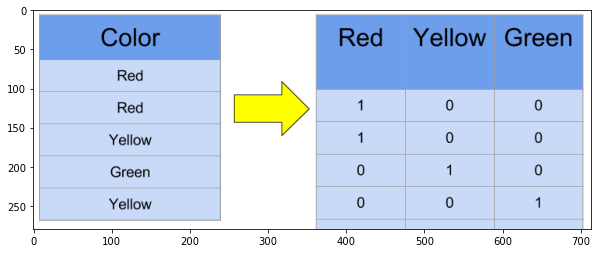

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("onehot.png")
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [23]:
df=pd.DataFrame({
    'ticker':['GOOG']*4+['AAPL']*4,
    'date':['2020-01-01','2020-01-02','2020-01-03','2020-01-04']*2,
    'open':[1200,1300,1100,1000,270,280,160,200]
})
df

,ticker,date,open
0,GOOG,2020-01-01,1200
1,GOOG,2020-01-02,1300
2,GOOG,2020-01-03,1100
3,GOOG,2020-01-04,1000
4,AAPL,2020-01-01,270
5,AAPL,2020-01-02,280
6,AAPL,2020-01-03,160
7,AAPL,2020-01-04,200


In [24]:
pd.get_dummies(df['ticker'])

,AAPL,GOOG
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0


In [26]:
pd.concat([df,pd.get_dummies(df['ticker'])],axis=1).drop(['ticker'],axis=1)

,date,open,AAPL,GOOG
0,2020-01-01,1200,0,1
1,2020-01-02,1300,0,1
2,2020-01-03,1100,0,1
3,2020-01-04,1000,0,1
4,2020-01-01,270,1,0
5,2020-01-02,280,1,0
6,2020-01-03,160,1,0
7,2020-01-04,200,1,0


### Unstack

In [29]:
df=df.append(df,ignore_index=True)
df

,ticker,date,open
0,GOOG,2020-01-01,1200
1,GOOG,2020-01-02,1300
2,GOOG,2020-01-03,1100
3,GOOG,2020-01-04,1000
4,AAPL,2020-01-01,270
5,AAPL,2020-01-02,280
6,AAPL,2020-01-03,160
7,AAPL,2020-01-04,200
8,GOOG,2020-01-01,1200
9,GOOG,2020-01-02,1300


In [30]:
df.groupby(['ticker','date'])['open'].mean()

ticker  date      
AAPL    2020-01-01     270
        2020-01-02     280
        2020-01-03     160
        2020-01-04     200
GOOG    2020-01-01    1200
        2020-01-02    1300
        2020-01-03    1100
        2020-01-04    1000
Name: open, dtype: int64

In [31]:
df.groupby(['ticker','date'])['open'].mean().unstack()

date,2020-01-01,2020-01-02,2020-01-03,2020-01-04
ticker,,,,
AAPL,270,280,160,200
GOOG,1200,1300,1100,1000


In [32]:
df.groupby(['ticker','date'])['open'].mean().unstack(0)

ticker,AAPL,GOOG
date,,
2020-01-01,270,1200
2020-01-02,280,1300
2020-01-03,160,1100
2020-01-04,200,1000


In [33]:
df.pivot_table(index='date',columns='ticker',values='open',aggfunc='mean')

ticker,AAPL,GOOG
date,,
2020-01-01,270,1200
2020-01-02,280,1300
2020-01-03,160,1100
2020-01-04,200,1000


In [42]:
df.drop_duplicates(subset=['date','ticker']).set_index(['ticker','date']).unstack(0)

open      
ticker     AAPL  GOOG
date                 
2020-01-01  270  1200
2020-01-02  280  1300
2020-01-03  160  1100
2020-01-04  200  1000

### Stack

In [45]:
df.drop_duplicates(subset=['date','ticker']).set_index(['ticker','date']).unstack(0).stack(1)

open
date       ticker      
2020-01-01 AAPL     270
           GOOG    1200
2020-01-02 AAPL     280
           GOOG    1300
2020-01-03 AAPL     160
           GOOG    1100
2020-01-04 AAPL     200
           GOOG    1000

In [51]:
df.pivot_table(index='date',columns='ticker',values='open').stack(0)

date        ticker
2020-01-01  AAPL       270
            GOOG      1200
2020-01-02  AAPL       280
            GOOG      1300
2020-01-03  AAPL       160
            GOOG      1100
2020-01-04  AAPL       200
            GOOG      1000
dtype: int64

### 多层index操作

In [62]:
grp=df.groupby(['ticker','date']).mean()
grp

open
ticker date            
AAPL   2020-01-01   270
       2020-01-02   280
       2020-01-03   160
       2020-01-04   200
GOOG   2020-01-01  1200
       2020-01-02  1300
       2020-01-03  1100
       2020-01-04  1000

In [63]:
[i[0]+' ,'+ i[1] for i in grp.index.ravel()]

['AAPL ,2020-01-01',
 'AAPL ,2020-01-02',
 'AAPL ,2020-01-03',
 'AAPL ,2020-01-04',
 'GOOG ,2020-01-01',
 'GOOG ,2020-01-02',
 'GOOG ,2020-01-03',
 'GOOG ,2020-01-04']

In [64]:
grp.index

MultiIndex([('AAPL', '2020-01-01'),
            ('AAPL', '2020-01-02'),
            ('AAPL', '2020-01-03'),
            ('AAPL', '2020-01-04'),
            ('GOOG', '2020-01-01'),
            ('GOOG', '2020-01-02'),
            ('GOOG', '2020-01-03'),
            ('GOOG', '2020-01-04')],
           names=['ticker', 'date'])

In [65]:
grp.index=[i[0]+' ,'+ i[1] for i in grp.index.ravel()]
grp

,open
"AAPL ,2020-01-01",270
"AAPL ,2020-01-02",280
"AAPL ,2020-01-03",160
"AAPL ,2020-01-04",200
"GOOG ,2020-01-01",1200
"GOOG ,2020-01-02",1300
"GOOG ,2020-01-03",1100
"GOOG ,2020-01-04",1000


In [66]:
grp.index

Index(['AAPL ,2020-01-01', 'AAPL ,2020-01-02', 'AAPL ,2020-01-03',
       'AAPL ,2020-01-04', 'GOOG ,2020-01-01', 'GOOG ,2020-01-02',
       'GOOG ,2020-01-03', 'GOOG ,2020-01-04'],
      dtype='object')

In [67]:
df['price']=1000
df

,ticker,date,open,price
0,GOOG,2020-01-01,1200,1000
1,GOOG,2020-01-02,1300,1000
2,GOOG,2020-01-03,1100,1000
3,GOOG,2020-01-04,1000,1000
4,AAPL,2020-01-01,270,1000
5,AAPL,2020-01-02,280,1000
6,AAPL,2020-01-03,160,1000
7,AAPL,2020-01-04,200,1000
8,GOOG,2020-01-01,1200,1000
9,GOOG,2020-01-02,1300,1000


In [68]:
df.pivot_table(index='date',columns='ticker',values=['open','price'])

open       price      
ticker     AAPL  GOOG  AAPL  GOOG
date                             
2020-01-01  270  1200  1000  1000
2020-01-02  280  1300  1000  1000
2020-01-03  160  1100  1000  1000
2020-01-04  200  1000  1000  1000

In [73]:
grp=df.pivot_table(index='date',columns='ticker',values=['open'])
grp

open      
ticker     AAPL  GOOG
date                 
2020-01-01  270  1200
2020-01-02  280  1300
2020-01-03  160  1100
2020-01-04  200  1000

In [74]:
grp.columns

MultiIndex([('open', 'AAPL'),
            ('open', 'GOOG')],
           names=[None, 'ticker'])

In [76]:
[i[0]+':'+i[1] for i in grp.columns.ravel()]

['open:AAPL', 'open:GOOG']

In [77]:
grp.columns=[i[0]+':'+i[1] for i in grp.columns.ravel()]
grp

,open:AAPL,open:GOOG
date,,
2020-01-01,270,1200
2020-01-02,280,1300
2020-01-03,160,1100
2020-01-04,200,1000


In [78]:
grp.columns

Index(['open:AAPL', 'open:GOOG'], dtype='object')

### 课后练习

In [ ]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

**Exercise:**

对每一个foo,和 bar的组合，算出 baz 的平均值

改变数据结构，以foo为index，bar为column，baz作为value

改变数据结构，以bar为index，foo为column，baz作为value